In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from seaborn import displot, set, pairplot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://pastebin.com/raw/MbkXPJ4g', index_col='Serial No.')
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


In [4]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


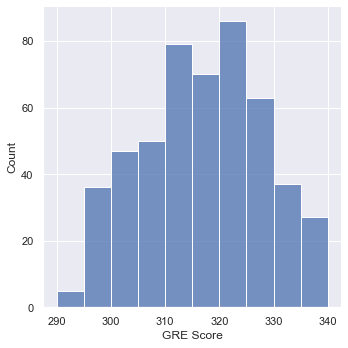

In [6]:
set(rc={'figure.figsize':(11.7, 8.27)})

displot(df['GRE Score'], bins=10)

plt.show()

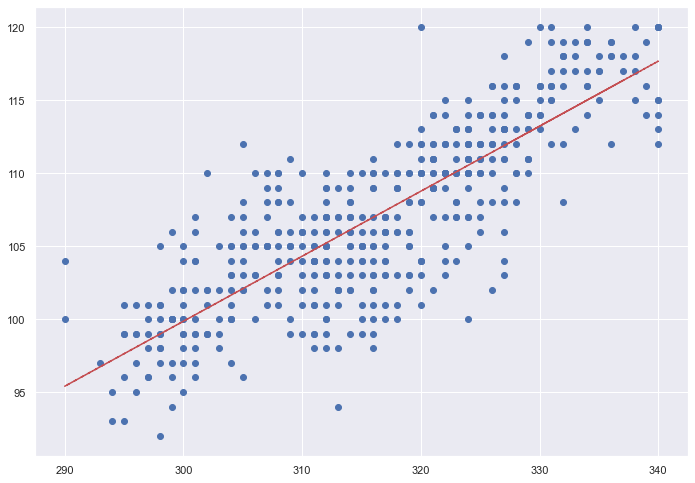

In [7]:
plt.scatter(x=df['GRE Score'].values, y=df['TOEFL Score'].values)

helper = np.polyfit(df['GRE Score'], df['TOEFL Score'], 1)

helper_1 = np.poly1d(helper)

plt.plot(df['GRE Score'], helper_1(df['GRE Score']), 'r--')

plt.show()

<AxesSubplot:>

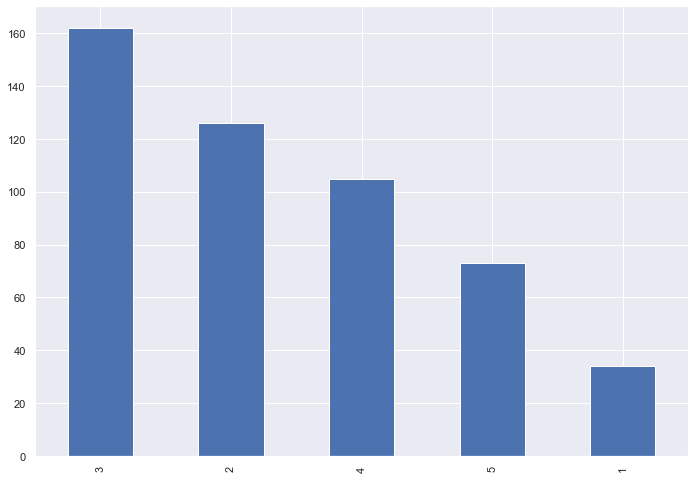

In [8]:
df['University Rating'].value_counts().plot(kind='bar')

plt.show()

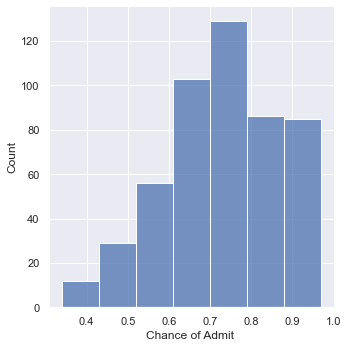

In [10]:
set(rc={'figure.figsize':(11.7, 8.27)})

displot(df['Chance of Admit '], bins=7)

plt.show()

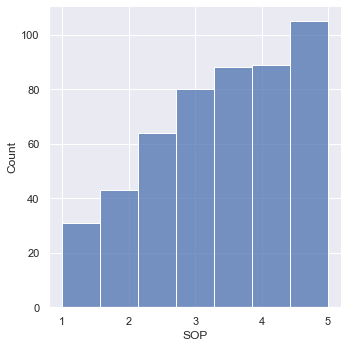

In [12]:
set(rc={'figure.figsize':(11.7, 8.27)})

displot(df['SOP'], bins=7)

plt.show()

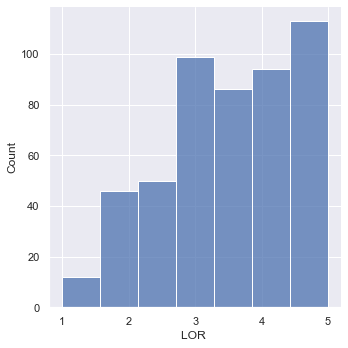

In [14]:
set(rc={'figure.figsize':(11.7, 8.27)})

displot(df['LOR '], bins=7)

plt.show()

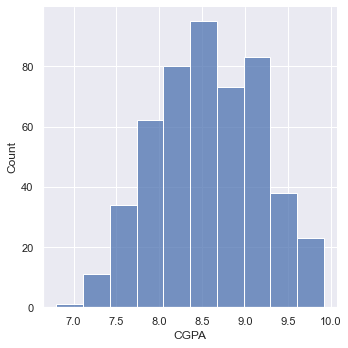

In [15]:
set(rc={'figure.figsize':(11.7, 8.27)})

displot(df['CGPA'], bins=10)

plt.show()

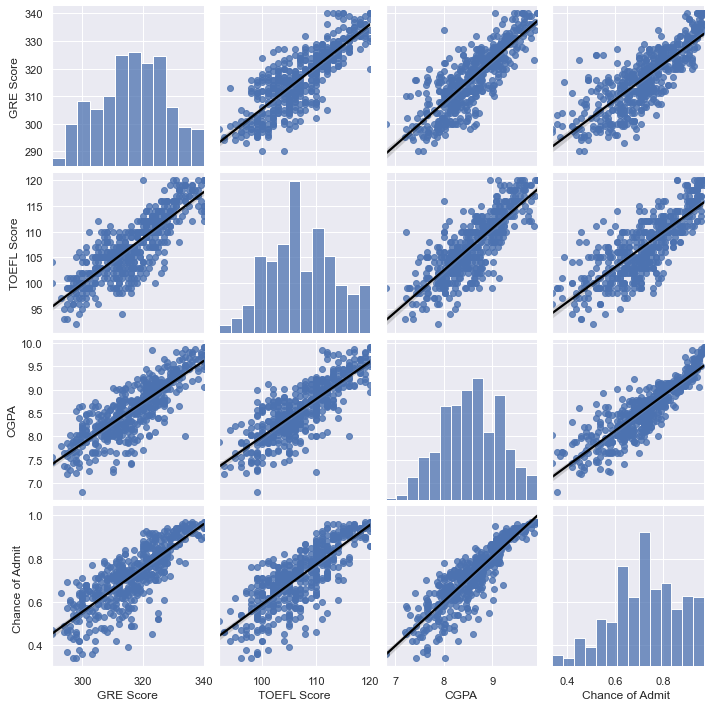

In [16]:
pairplot(data=df.drop(columns=['University Rating', 'Research', 'SOP', 'LOR ']), kind='reg', plot_kws={'line_kws':{'color':'black'}})

plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Chance of Admit ']), df['Chance of Admit '], test_size=0.3, random_state=22)

In [18]:
reg = LinearRegression()

In [19]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [20]:
# Hitung Mean Squered Error
mean_squared_error(y_test, y_pred)

0.0031172663433275136

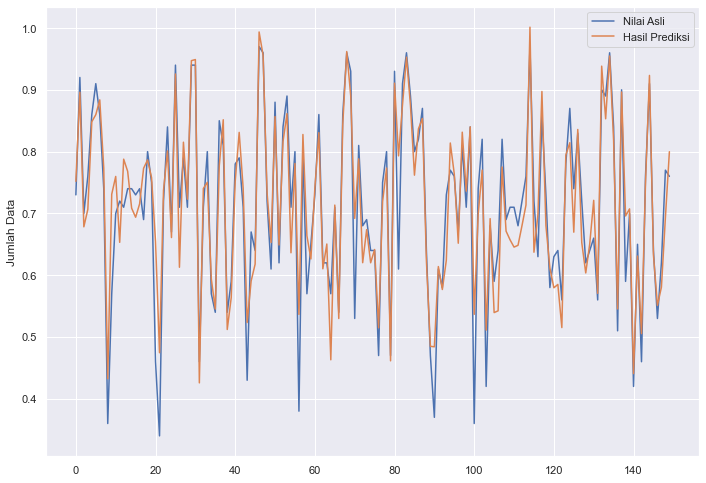

In [21]:
plt.plot(list(y_test), label='Nilai Asli')
plt.plot(list(y_pred), label='Hasil Prediksi')

plt.legend(loc='upper right')
plt.ylabel('Jumlah Data')

plt.show()

In [22]:
from joblib import dump

dump(reg, filename='model_admission.pkl')

['model_admission.pkl']

In [23]:
!streamlit run masuk_kampus.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...

Error: Invalid value: File does not exist: masuk_kampus.py
